#### *Description:*

#### *The datasets describe ratings and free-text tagging activities from MovieLens, a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on October 17, 2016.*

#### *Users were selected at random for inclusion. All selected users had rated at least 20 movies.*

#### Short explanation of titles from dataset:

### movie.csv
1. movieId – unique movie number
2. title – movie name
3. movieId – unique movie number

### rating.csv
1. userid – unique user number
2. movieId – unique movie number
3. rating – the rating given to the movie by the user
4. timestamp – movie release date

#### Import libraries and get the dataset.

#### Hybrid Recommend System (Item-Based and User-Based)
#### Hybrid recommender systems are used to improve the quality of the model and make more effective recommendations.
#### User-Based: User-Based Collaborative Filtering is a technique used to predict the items that a user might like on the basis of ratings given to that item by the other users who have similar taste with that of the target user.
#### Item-Based: It is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items.

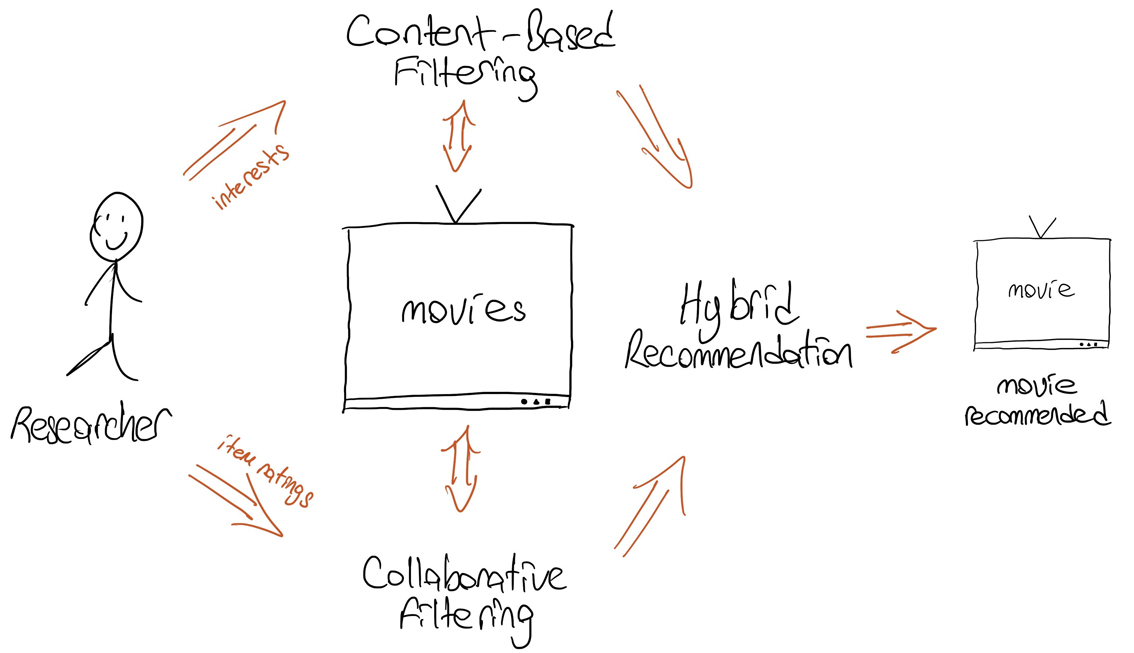

In [1]:
import pandas as pd
import seaborn as sns
import random

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/movielens-20m-dataset/rating.csv
/kaggle/input/movielens-20m-dataset/link.csv
/kaggle/input/movielens-20m-dataset/genome_tags.csv
/kaggle/input/movielens-20m-dataset/genome_scores.csv
/kaggle/input/movielens-20m-dataset/tag.csv
/kaggle/input/movielens-20m-dataset/movie.csv


In [3]:
movie = pd.read_csv("../input/movielens-20m-dataset/movie.csv")

In [4]:
rating = pd.read_csv("../input/movielens-20m-dataset/rating.csv")

In [5]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


#### We merge both datasets with the same column "movieId"

In [7]:
df_ = movie.merge(rating, how="left", on="movieId")
df = df_.copy()
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,2009-01-02 01:13:41


#### There are also some movies in dataset, that they really less ratings count. That's why it would be better, if we throw out them and continue with common movies. So, we define rare and common movies. We create a list as rating_counts, see how they are distributed and take the limit quantile 90% for common movies. Finally create a table which users watched which movies. Here is important to understand table, because we take our users to the index and the columns for movies. 

In [8]:
def create_user_movie_df():
    rating_counts = pd.DataFrame(df["title"].value_counts())
    rating_counts.describe([0.05, 0.50, 0.75, 0.85, 0.90, 0.95, 0.99]).T
    limit = rating_counts.quantile([0.90]).T
    limit_90 = limit[0.9][0]
    rare_movies = rating_counts[rating_counts["title"] <= limit_90].index
    common_movies = df[~df["title"].isin(rare_movies)]
    user_movie_df = common_movies.pivot_table(index="userId", columns="title", values="rating")
    return user_movie_df

In [9]:
user_movie_df = create_user_movie_df()
user_movie_df.head() 

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),127 Hours (2010),...,Young Guns II (1990),Young Sherlock Holmes (1985),Zack and Miri Make a Porno (2008),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### We choose a random user and check the userId. After that we can also check which movies our user watched at last and pick the last one.

In [10]:
def random_user_choose(user_movie_df, random_state):
    random_user = int(pd.Series(user_movie_df.index).sample(1, random_state=random_state).values)
    return random_user

In [11]:
random_user = random_user_choose(user_movie_df, random_state=33)
random_user

10625

In [12]:
def movie_id_actual():
    movie_id_act = rating[(rating["userId"] == random_user) & (rating["rating"] >= 4.0)]. \
        sort_values(by="timestamp", ascending=False)["movieId"][0:1].tolist()
    return movie_id_act[0]

In [13]:
movie_id = movie_id_actual()
movie_id

47

#### Let's see what movie it is.

In [14]:
def movie_id_name(dataframe, movie_ID):
    movie_name = dataframe[dataframe["movieId"] == movie_ID][["title"]].values[0].tolist()
    return movie_name[0]

In [15]:
movie_name = movie_id_name(df, movie_id)
movie_name

'Seven (a.k.a. Se7en) (1995)'

#### See the our five movie recommends with Item-Based...

In [16]:
def item_based_recommender(movie_name, user_movie_df, random_user):
    movie_name = user_movie_df[movie_name]
    recommend_list = user_movie_df.corrwith(movie_name).sort_values(ascending=False).head(20)
    recommend_list = recommend_list.reset_index()
    recommend_list = recommend_list["title"].tolist()
    recommend_list

    random_user_df = user_movie_df[user_movie_df.index == random_user]
    random_user_movies_watched = random_user_df.columns[random_user_df.notna().any()].tolist()
    random_user_movies_watched_df = user_movie_df[random_user_movies_watched]
    random_user_movies_watched_df = random_user_movies_watched_df.columns.tolist()

    movie_to_recommend = [i for i in random_user_movies_watched_df if i not in recommend_list]
    movie_to_recommend = random.sample(movie_to_recommend, 5)
    return movie_to_recommend

In [17]:
item_based_recommender(movie_name, user_movie_df, random_user)

['Dumb & Dumber (Dumb and Dumber) (1994)',
 'Clear and Present Danger (1994)',
 'So I Married an Axe Murderer (1993)',
 'Crow, The (1994)',
 'Star Trek: Generations (1994)']

#### And see other 5 movie recommends with User-Based...

In [18]:
def movie_name(dataframe, movieId_list):
    for i in movieId_list:
        movie_name = dataframe[dataframe["movieId"] == i][["title"]].values[0].tolist()
        print(movie_name)

In [19]:
def user_based_recommender(user_movie_df, random_user):
    random_user_df = user_movie_df[user_movie_df.index == random_user]
    random_user_movies_watched = random_user_df.columns[random_user_df.notna().any()].tolist()
    movies_watched_df = user_movie_df[random_user_movies_watched]

    user_movie_count = movies_watched_df.T.notnull().sum()
    user_movie_count = user_movie_count.reset_index()
    user_movie_count.columns = ["userId", "movie_count"]

    user_movie_count.describe([0.05, 0.50, 0.75, 0.85, 0.90, 0.95, 0.99]).T
    limit_movie = user_movie_count.quantile([0.99]).T
    limit_movie_99 = limit_movie[0.99][1]

    users_same_movies = user_movie_count[user_movie_count["movie_count"] >= limit_movie_99]["userId"]
    final_df = movies_watched_df[movies_watched_df.index.isin(users_same_movies)]
    
    final_df.T.corr()
    corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
    corr_df = pd.DataFrame(corr_df, columns=["corr"])
    corr_df.index.names = ["userId_1", "userId_2"]
    corr_df = corr_df.reset_index()

    same_users = corr_df[(corr_df["userId_1"] == random_user)]
    same_users.describe([0.05, 0.50, 0.75, 0.85, 0.90, 0.95, 0.99]).T
    limit_same_user = same_users.quantile([0.95]).T
    limit_same_users_95 = limit_same_user[0.95][2]

    top_users = corr_df[(corr_df["userId_1"] == random_user) & (corr_df["corr"] >= limit_same_users_95)][["userId_2", "corr"]].reset_index(drop=True)
    top_users = top_users.sort_values(by="corr", ascending=False)
    top_users.rename(columns={"userId_2": "userId"}, inplace=True)
    top_users_rating = top_users.merge(rating[["userId", "movieId", "rating"]], how="inner")
    top_users_rating = top_users_rating[top_users_rating["userId"] != random_user]

    top_users_rating["weighted_rating"] = top_users_rating["corr"] * top_users_rating["rating"]
    recommendation_df = top_users_rating.groupby("movieId")["weighted_rating"].mean()
    recommendation_df = recommendation_df.reset_index()
    recommendation_df_5 = recommendation_df.sort_values(by="weighted_rating", ascending=False).head(5)
    recommendation_df_5_list = recommendation_df_5["movieId"].tolist()

    return movie_name(df, recommendation_df_5_list)

In [20]:
user_based_recommender(user_movie_df, random_user)

['More (1998)']
['Faust (1926)']
['Rocky Saga: Going the Distance, The (2011)']
['Walkabout (1971)']
['Robot Carnival (Roboto kânibauru) (1987)']
